# Maximum Profile Validation

Here we consider maximum profiles generated by two sets of data in 08641. See the detail of construction starting from 01_07.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pytz
import os
import patsy #for spline regression
import scipy #for non-negative least square 
import scipy as sp 
from scipy import stats
from scipy.optimize import nnls
from numpy.linalg import inv #for matrix and statistics
import scipy as sp
import math
import statsmodels.api as sm
%matplotlib inline

In [2]:
#specify data source 
datasource = 'L'

In [3]:
zipcode = '08641'

In [4]:
#mainDir = 'C:/Users/umnouyp/Dropbox/Active/EnergyProject/Thesis/PVreadingsStudies/main'
#mainDir = 'C:/Users/Tee/Dropbox/Active/EnergyProject/Thesis/PVreadingsStudies/main'
mainDir = 'C:\Users\Admin\Dropbox\Active\EnergyProject\Thesis'
#we can choose which data to look at.
dataDir = mainDir + '/data/solar/' + datasource +'/' + zipcode +'/'
outputDir = mainDir + '/output/'+ datasource +'/' + zipcode +'/'

In [5]:
#call fitted data from two set of data
data = pd.read_csv(dataDir +'/training_data_fitted_1.csv')
data['tsLocal'] = data['tsLocal'].map(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
data1 = data

data = pd.read_csv(dataDir +'/training_data_fitted_2.csv')
data['tsLocal'] = data['tsLocal'].map(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))
data2 = data

In [6]:
data1.shape, data2.shape

((35442, 9), (35442, 9))

We know from Part I that we can adjust our curve by adding constant. 

In [7]:
shift_1 = np.max(data1['power']-data1['mpower'])
shift_2 = np.max(data2['power']-data2['mpower'])

data1['mpower'] = data1['mpower']+shift_1
data2['mpower'] = data2['mpower']+shift_2

(0, 1.2)

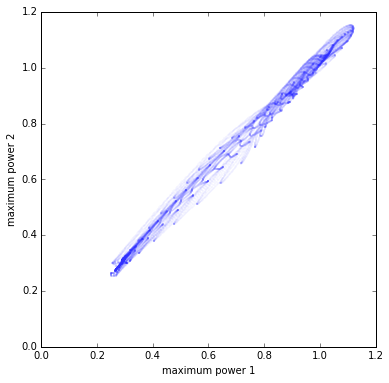

In [22]:
fig = plt.figure(figsize=(6,6))
ax1  = fig.add_subplot(111)

ax1.set_aspect('equal')
ax1.plot(data1.mpower, data2.mpower,'.',markersize=0.1)
ax1.set_xlabel('maximum power 1')
ax1.set_ylabel('maximum power 2')
ax1.set_xlim([0,1.2])
ax1.set_ylim([0,1.2])

We can find the maximum and average difference between two maximum profiles:

In [9]:
np.max(np.absolute(data1.mpower-data2.mpower)),np.mean(np.absolute(data1.mpower-data2.mpower))

(0.091017283998425347, 0.026864684247535294)

q =0.5 : (0.091017283998418463, 0.026864684247563792)

q =0.75: (0.15028071602090493, 0.046204882529120778)


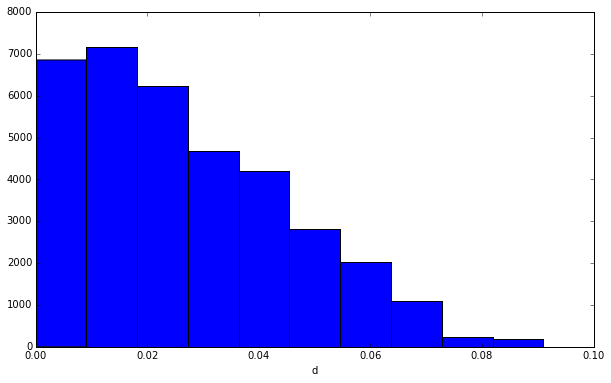

In [10]:
fig = plt.figure(figsize=(10,6))
ax1  = fig.add_subplot(111)
ax1.hist(list((np.absolute(data1.mpower-data2.mpower))))
ax1.set_xlabel('d')

That is, the maximum profile inherently gives mean error estimate of 0.0269. If we use yearly energy generation as a measure, we get even lower number.

In [23]:
mean = (np.sum(data1['mpower'])+np.sum(data2['mpower']))/2
d = (np.absolute(np.sum(data1['mpower'])-mean)+(np.sum(data2['mpower'])-mean))/2/mean

In [24]:
d

0.015860489544398653